In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.metrics                 import  mean_squared_error


### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
#It is recommended that we make our time series reference as the index
df = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [3]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


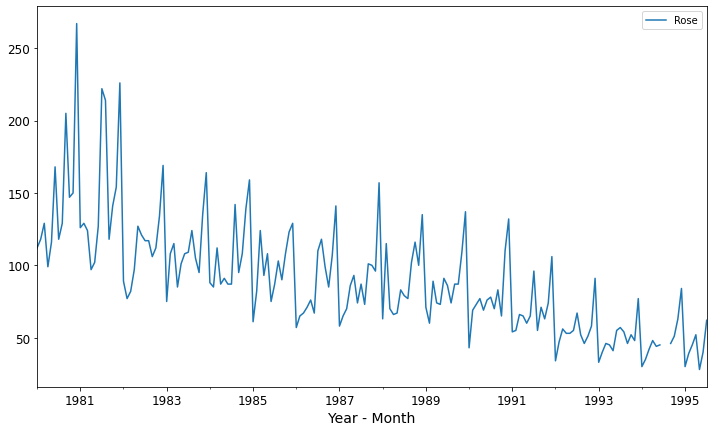

In [4]:
df.plot(figsize=(12,7))
plt.xlabel('Year - Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Basic EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [6]:
df.index.duplicated().sum()
# no duplicate values

0

In [7]:
df.index[0]
# start date of the data

Timestamp('1980-01-01 00:00:00')

In [8]:
df.index[-1]
#end date of the data

Timestamp('1995-07-01 00:00:00')

In [9]:
df['Rose'].isnull().sum()
# 2 missing values

2

In [10]:
df[df['Rose'].isnull()]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [11]:
df=df.interpolate()

In [12]:
df.isnull().sum()

Rose    0
dtype: int64

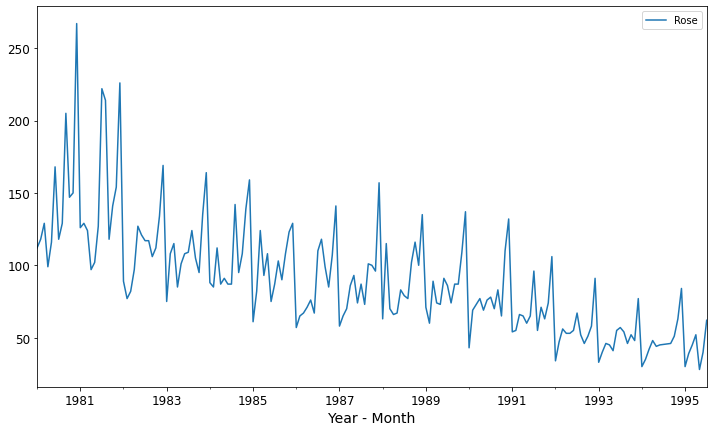

In [13]:
df.plot(figsize=(12,7))
plt.xlabel('Year - Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
data=df.copy()
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(data))
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
data['Year'] = dates.year
data = data[['Month', 'Year', 'Rose']]
data.set_index(dates,inplace=True)
data

,Month,Year,Rose
1980-01-01,Jan,1980,112.0
1980-02-01,Feb,1980,118.0
1980-03-01,Mar,1980,129.0
1980-04-01,Apr,1980,99.0
1980-05-01,May,1980,116.0
...,...,...,...
1995-03-01,Mar,1995,45.0
1995-04-01,Apr,1995,52.0
1995-05-01,May,1995,28.0
1995-06-01,Jun,1995,40.0


In [15]:
monthly_sales_data = pd.pivot_table(data, values = "Rose", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
np.round(monthly_sales_data,1)


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
Feb,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
Mar,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
Apr,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
May,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0
Jun,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
Jul,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,45.3,62.0
Aug,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,45.7,NaN
Sep,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.0,NaN


<AxesSubplot:xlabel='Month'>

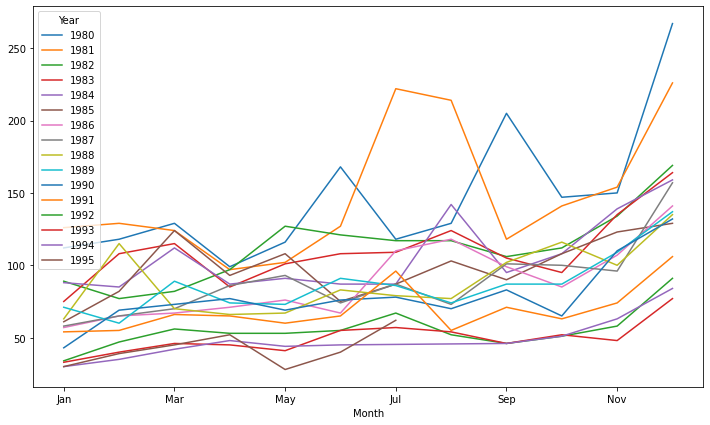

In [16]:
monthly_sales_data.plot(figsize=(12,7))

In [17]:
yearly_sales_data = pd.pivot_table(data, values = "Rose", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
np.round(yearly_sales_data,1)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


<AxesSubplot:xlabel='Year'>

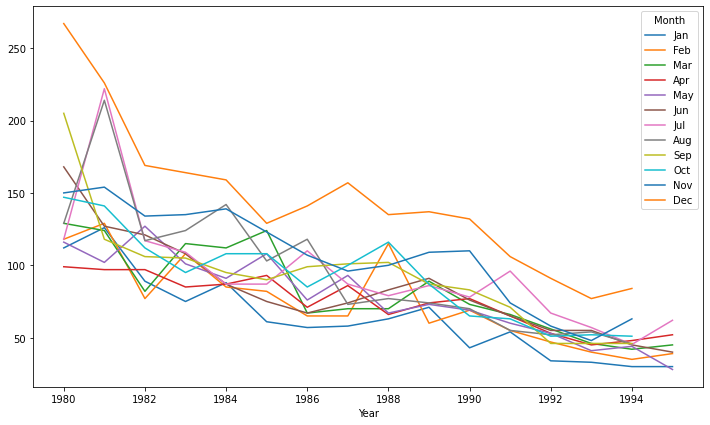

In [18]:
yearly_sales_data.plot(figsize=(12,7))

<AxesSubplot:xlabel='Month'>

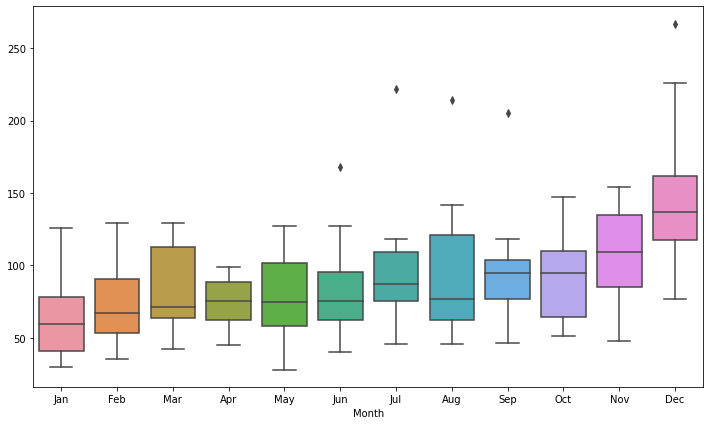

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(data=yearly_sales_data)

<AxesSubplot:xlabel='Year'>

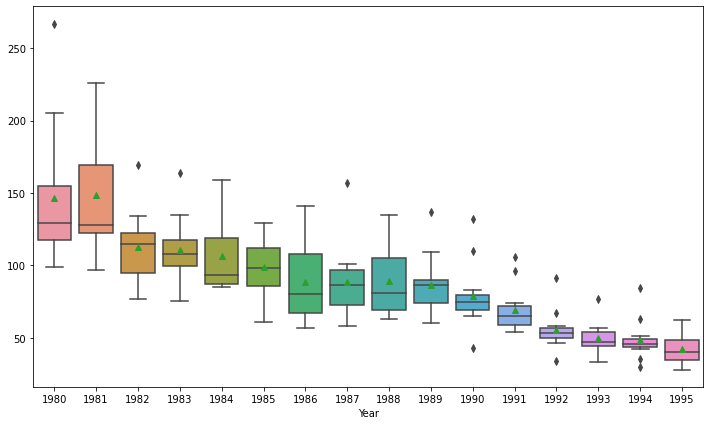

In [20]:
plt.figure(figsize=(12,7))

sns.boxplot(data=monthly_sales_data, showmeans=True)

In [21]:
df.describe().round(2)

,Rose
count,187.00
mean,89.91
std,39.24
min,28.00
25%,62.50
50%,85.00
75%,111.00
max,267.00


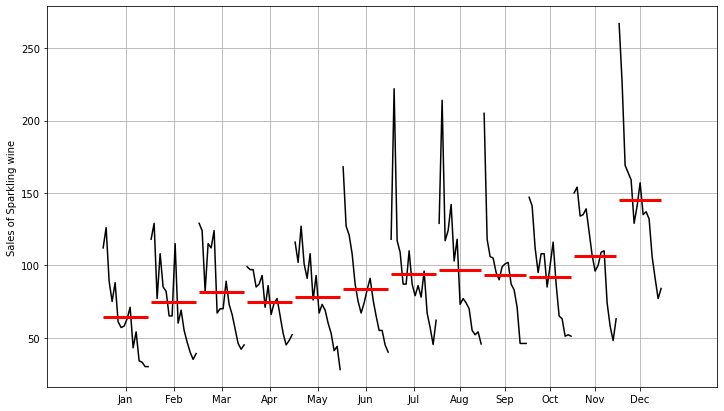

In [22]:
#month plot
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(12,7))

month_plot(df,ylabel='Sales of Sparkling wine',ax=ax)
plt.grid();

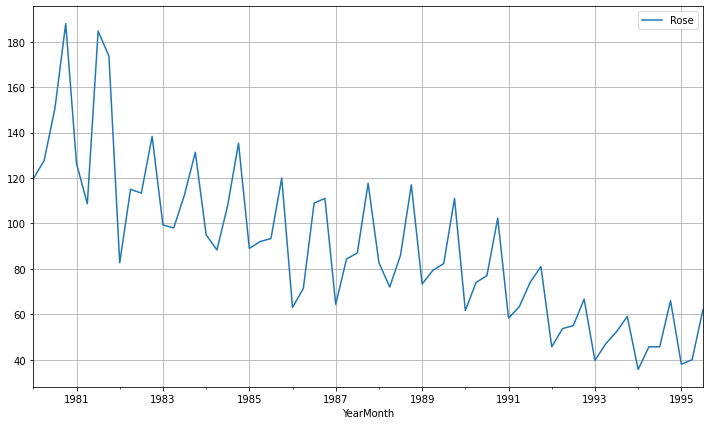

In [23]:
#quarterly plot
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot(figsize=(12,7));
plt.grid()

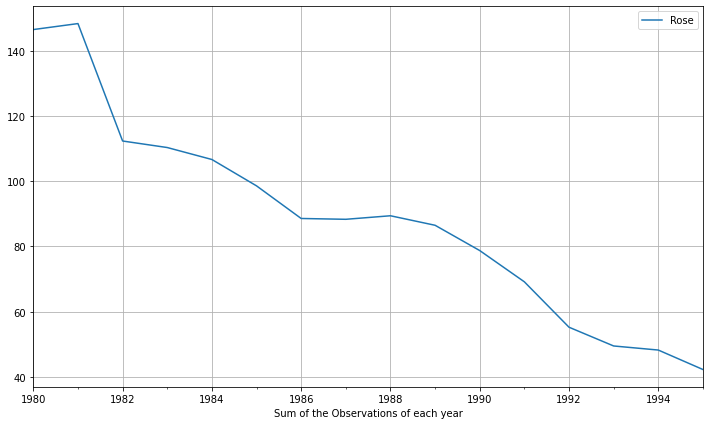

In [24]:
#yearly plot
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot(figsize=(12,7));
plt.grid()
plt.xlabel('Sum of the Observations of each year');

## Additive Decomposition

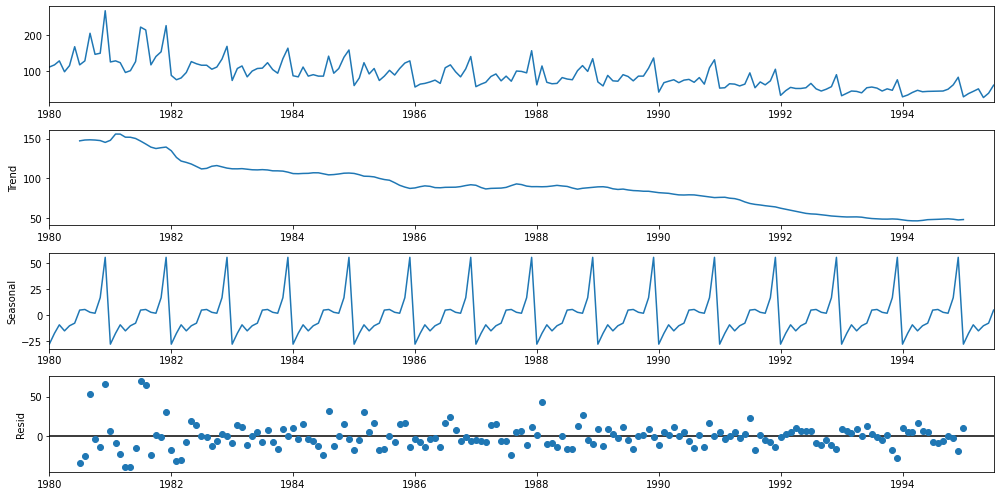

In [25]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

## Multiplicative Decomposition

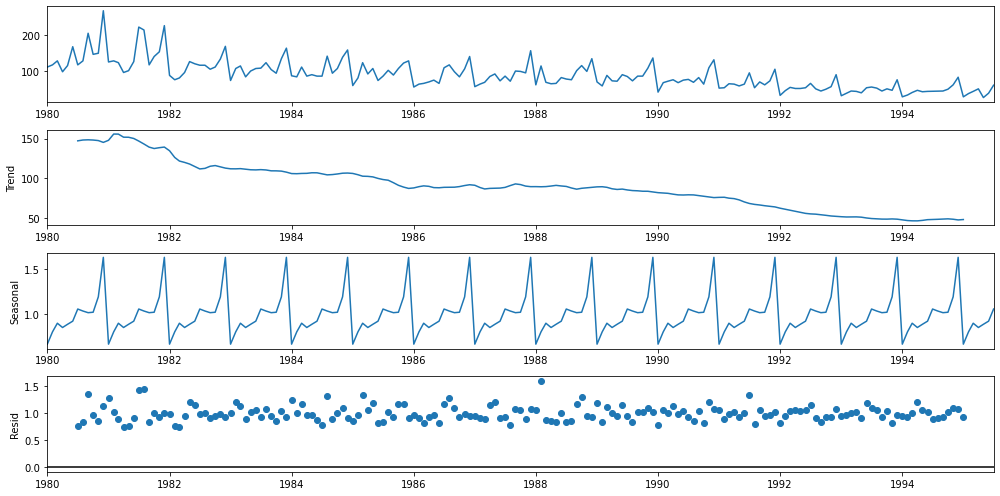

In [26]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

### 3. Split the data into training and test. The test data should start in 1991.

In [27]:
train = df[df.index<'1991'] 
test  = df[df.index>='1991']

In [28]:
train

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0


In [29]:
test

,Rose
YearMonth,
1991-01-01,54.000000
1991-02-01,55.000000
1991-03-01,66.000000
1991-04-01,65.000000
1991-05-01,60.000000
1991-06-01,65.000000
1991-07-01,96.000000
1991-08-01,55.000000
1991-09-01,71.000000


In [30]:
test.shape

(55, 1)

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print(train_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [32]:
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

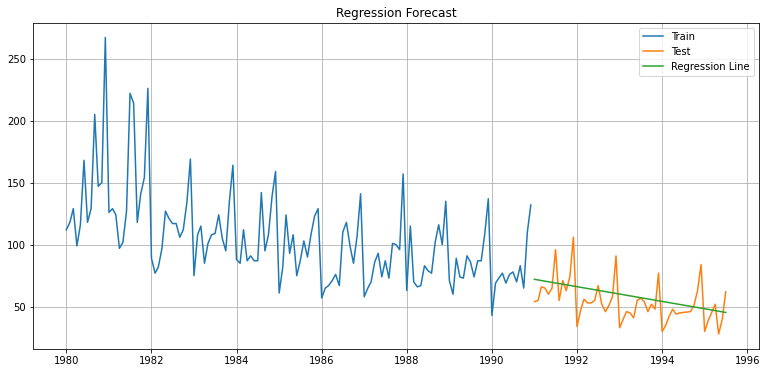

In [34]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression Line')
plt.legend(loc='best')
plt.grid()
plt.title('Regression Forecast');

In [35]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=test_predictions_model1
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,72.063266
1991-02-01,55.0,71.568888
1991-03-01,66.0,71.074511
1991-04-01,65.0,70.580133
1991-05-01,60.0,70.085755
1991-06-01,65.0,69.591377
1991-07-01,96.0,69.096999
1991-08-01,55.0,68.602621
1991-09-01,71.0,68.108243


# Model Evaluation

In [36]:
from sklearn import metrics

In [37]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

resultsDf = pd.DataFrame({'Test RMSE': [round(rmse_model1_test,3)]},index=['Linear Regression'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


,Test RMSE
Linear Regression,15.269


# Model 2: Naive Forecast 

In [38]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()
train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [39]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

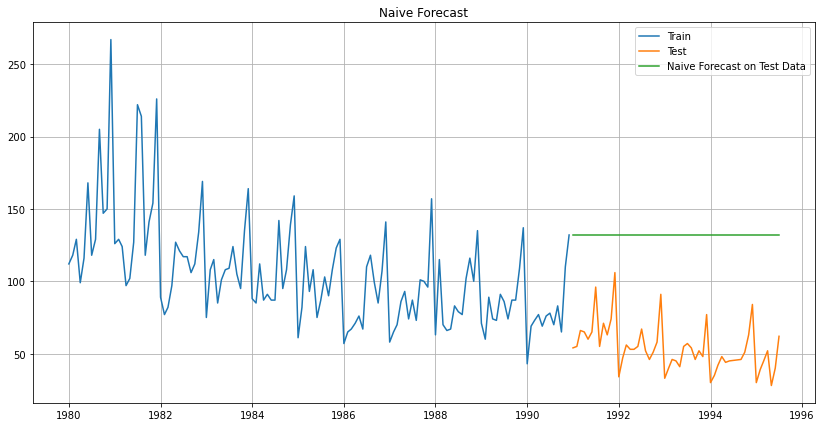

In [40]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.grid()

plt.title("Naive Forecast");

In [41]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=NaiveModel_test['naive']
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,132.0
1991-02-01,55.0,132.0
1991-03-01,66.0,132.0
1991-04-01,65.0,132.0
1991-05-01,60.0,132.0
1991-06-01,65.0,132.0
1991-07-01,96.0,132.0
1991-08-01,55.0,132.0
1991-09-01,71.0,132.0


# Model Evaluation

In [42]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For Naive model forecast on the Test Data,  RMSE is 79.719


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773


# Model 3: Simple  Average

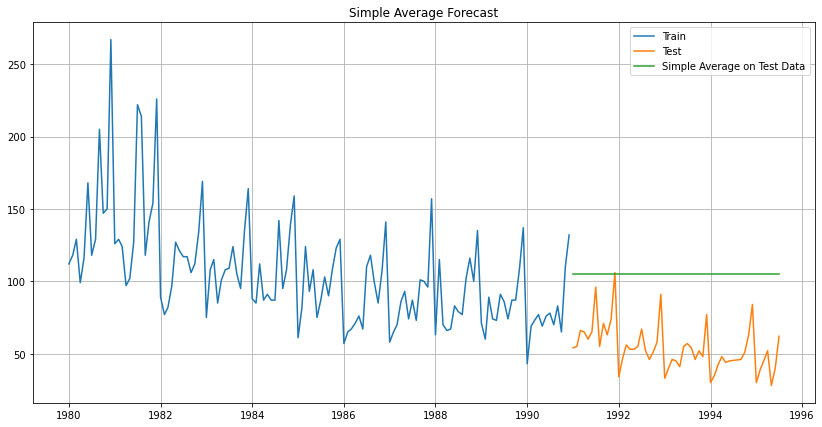

In [43]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()

plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.grid()
plt.title("Simple Average Forecast");

In [44]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=SimpleAverage_test['mean_forecast']
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394
1991-06-01,65.0,104.939394
1991-07-01,96.0,104.939394
1991-08-01,55.0,104.939394
1991-09-01,71.0,104.939394


# Model Evaluation

In [45]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))


resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]} ,index=['Simple Average Model'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 53.461


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570


In [46]:
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

# Moving Average Model

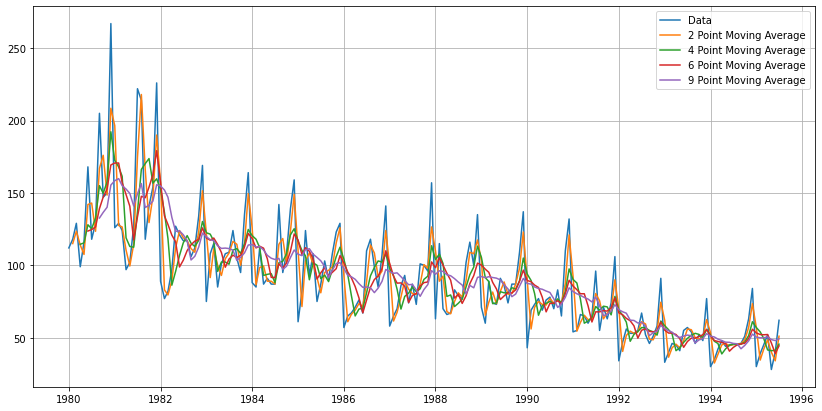

In [47]:
MovingAverage = df.copy()


# trailing moving averages
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();


In [48]:
MovingAverage[MovingAverage.index>='1991'].head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,54.0,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667
1991-06-01,65.0,62.5,64.00,60.833333,74.666667
1991-07-01,96.0,80.5,71.50,67.833333,78.111111
1991-08-01,55.0,75.5,69.00,67.833333,72.000000
1991-09-01,71.0,63.0,71.75,68.666667,65.222222


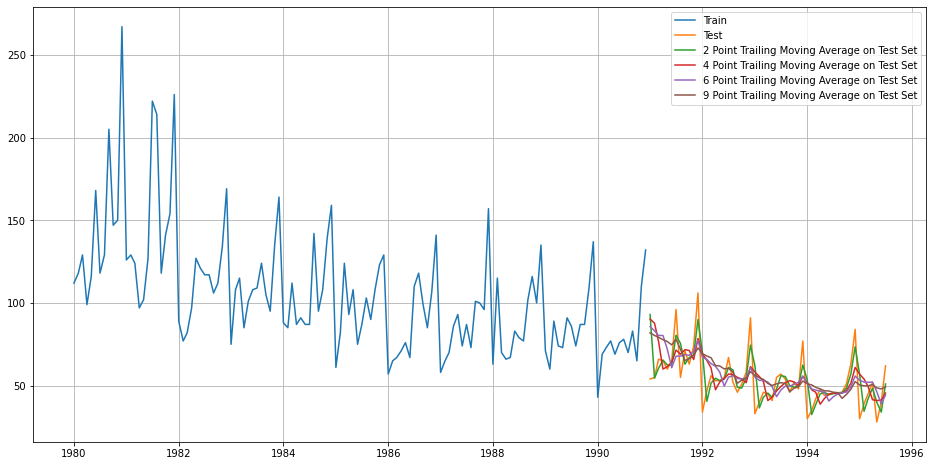

In [49]:
#Creating train and test set #Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

## Plotting on both the Training and Test data


plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

## Model Evaluation

In [50]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [51]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


# Model 4: Simple Exponential Smoothing

Predictions of Simple Exponential Smoothing : 

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


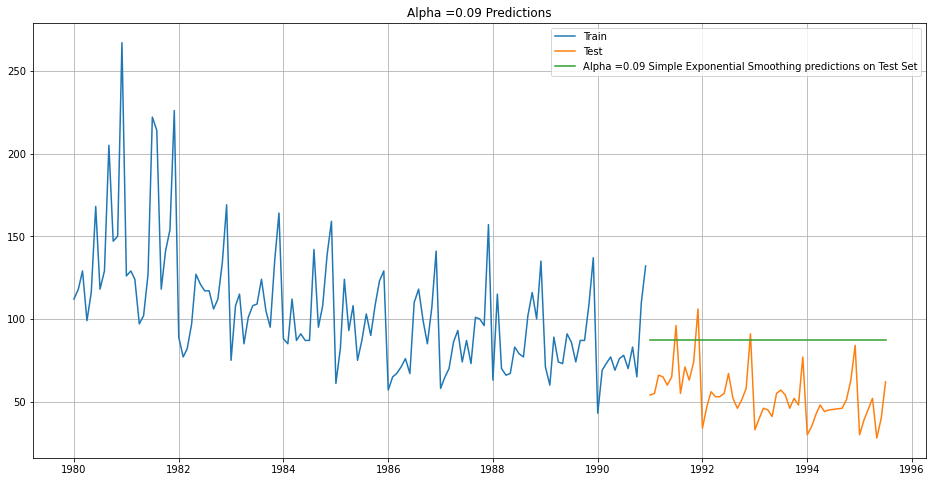

In [52]:
#initializing the model
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
#fitting the model
model_SES_autofit = model_SES.fit(optimized=True)

SES_predict = model_SES_autofit.forecast(steps=len(test))
print('Predictions of Simple Exponential Smoothing : \n')
print(SES_predict,'\n\n')

#checking the parameters
print('Parameters of SES :')
print(model_SES_autofit.params,'\n\n')#alpha = 0.07 which implies the prediction is not closely related to the previous value. 

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09 Predictions');

In [53]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=SES_predict
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,87.104997
1991-02-01,55.0,87.104997
1991-03-01,66.0,87.104997
1991-04-01,65.0,87.104997
1991-05-01,60.0,87.104997
1991-06-01,65.0,87.104997
1991-07-01,96.0,87.104997
1991-08-01,55.0,87.104997
1991-09-01,71.0,87.104997


In [54]:
# Model Evaluation

In [55]:
rmse_model4_test=mean_squared_error(test.values,SES_predict.values,squared=False)
print('For the simple exponential smoothing on test data, RMSE is',rmse_model4_test)

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test]} ,index=['Alpha = 0.09, SES'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

For the simple exponential smoothing on test data, RMSE is 36.79624054770398


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha = 0.09, SES",36.796241


# Model 5: Double Exponential Smoothing:

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predictions of Double Exponential Smoothing : 

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52

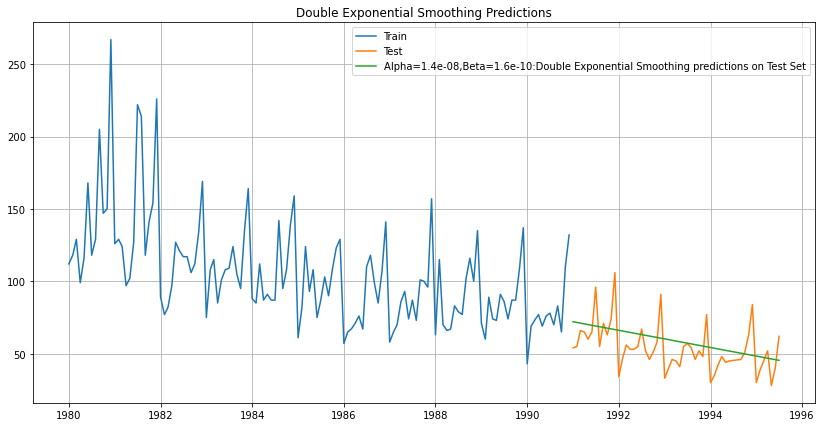

In [56]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')

# Fitting the model
model_DES = model_DES.fit(optimized=True)


# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
print('Predictions of Double Exponential Smoothing : \n')
print(DES_predict,'\n\n')

#checking the parameters
print('Parameters of DES :')
print(model_DES.params,'\n\n')


## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label='Alpha=1.4e-08,Beta=1.6e-10:Double Exponential Smoothing predictions on Test Set')
plt.grid()

plt.legend(loc='best')
plt.title('Double Exponential Smoothing Predictions');



In [57]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=DES_predict
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,72.063238
1991-02-01,55.0,71.568859
1991-03-01,66.0,71.074481
1991-04-01,65.0,70.580103
1991-05-01,60.0,70.085725
1991-06-01,65.0,69.591347
1991-07-01,96.0,69.096969
1991-08-01,55.0,68.602590
1991-09-01,71.0,68.108212


# Model Evaluation

In [58]:
rmse_model5_test=mean_squared_error(test.values,DES_predict.values,squared=False)
print('For the double exponential smoothing on test data, RMSE is',rmse_model5_test)

resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]} ,index=['Alpha=1.4e-08, Beta=1.6e-10, DES'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

For the double exponential smoothing on test data, RMSE is 15.268943764436564


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha = 0.09, SES",36.796241
"Alpha=1.4e-08, Beta=1.6e-10, DES",15.268944


# Model 6: Triple Exponential Smoothing (Holt - Winter Model) - Multiplicative seasonality

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predictions of Triple Exponential Smoothing : 

1991-01-01     56.321655
1991-02-01     63.664690
1991-03-01     69.374024
1991-04-01     60.435528
1991-05-01     67.758341
1991-06-01     73.546478
1991-07-01     80.630117
1991-08-01     85.541323
1991-09-01     80.707713
1991-10-01     78.764555
1991-11-01     91.531230
1991-12-01    125.788433
1992-01-01     54.168902
1992-02-01     61.223492
1992-03-01     66.705377
1992-04-01     58.103246
1992-05-01     65.135026
1992-06-01     70.689855
1992-07-01     77.488188
1992-08-01     82.197159
1992-09-01     77.542202
1992-10-01     75.665128
1992-11-01     87.917577
1992-12-01    120.805914
1993-01-01     52.016149
1993-02-01     58.782294
1993-03-01     64.036730
1993-04-01     55.770964
1993-05-01     62.511711
1993-06-01     67.833232
1993-07-01     74.346259
1993-08-01     78.852995
1993-09-01     74.376691
1993-10-01     72.565700
1993-11-01     84.303925
1993-12-01    115.823395
1994-01-01     49.863396
1994-02-01     56.341097
19

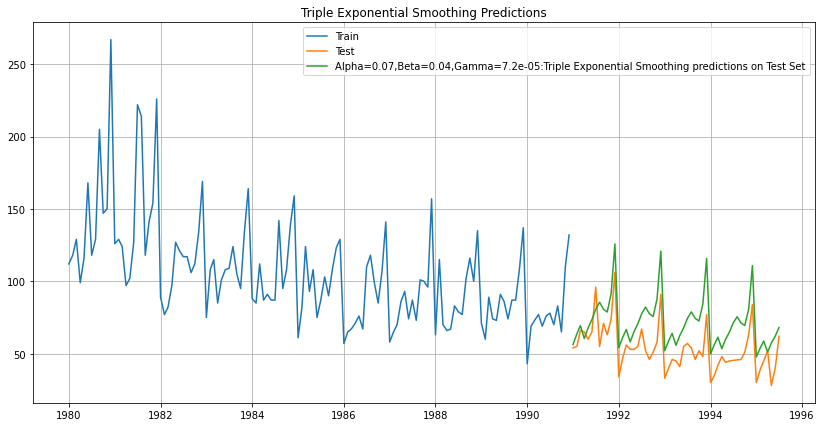

In [59]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()



# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
print('Predictions of Triple Exponential Smoothing : \n')
print(TES_predict_am,'\n\n')


#checking the parameters
print('Parameters of TES :')
print(model_TES_am.params,'\n\n')


## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_am, label='Alpha=0.07,Beta=0.04,Gamma=7.2e-05:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');




In [60]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=TES_predict_am
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,56.321655
1991-02-01,55.0,63.664690
1991-03-01,66.0,69.374024
1991-04-01,65.0,60.435528
1991-05-01,60.0,67.758341
1991-06-01,65.0,73.546478
1991-07-01,96.0,80.630117
1991-08-01,55.0,85.541323
1991-09-01,71.0,80.707713


# Model Evaluation

In [61]:
rmse_model6_test=mean_squared_error(test.values,TES_predict_am.values,squared=False)
print('For the triple exponential smoothing on test data, RMSE is',rmse_model6_test)

resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]} ,index=['Alpha=0.07,Beta=0.04,Gamma=7.2e-05 TES(A,A,M)'])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

For the triple exponential smoothing on test data, RMSE is 20.156762582665337


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha = 0.09, SES",36.796241
"Alpha=1.4e-08, Beta=1.6e-10, DES",15.268944
"Alpha=0.07,Beta=0.04,Gamma=7.2e-05 TES(A,A,M)",20.156763


### Model 7: Triple Exponential Smoothing (Holt - Winter Model) - Additive seasonality


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predictions of Triple Exponential Smoothing : 

1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
19

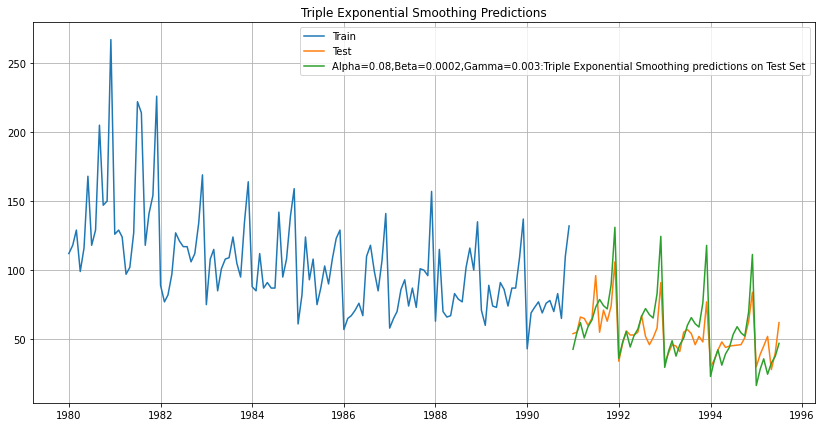

In [101]:
# Initializing the Double Exponential Smoothing Model
model_TES_aa = ExponentialSmoothing(train,trend='add',seasonal='add',initialization_method='estimated')
# Fitting the model
model_TES_aa = model_TES_aa.fit()



# Forecasting using this model for the duration of the test set
TES_predict_aa =  model_TES_aa.forecast(len(test))
print('Predictions of Triple Exponential Smoothing : \n')
print(TES_predict_aa,'\n\n')


#checking the parameters
print('Parameters of TES :')
print(model_TES_aa.params,'\n\n')


## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_aa, label='Alpha=0.08,Beta=0.0002,Gamma=0.003:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');


In [102]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=TES_predict_aa
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,42.684928
1991-02-01,55.0,54.564005
1991-03-01,66.0,61.995209
1991-04-01,65.0,50.852018
1991-05-01,60.0,59.034271
1991-06-01,65.0,63.850901
1991-07-01,96.0,73.190805
1991-08-01,55.0,78.724624
1991-09-01,71.0,74.276280


# Model Evaluation

In [103]:
rmse_model7_test=mean_squared_error(test.values,TES_predict_aa.values,squared=False)
print('For the triple exponential smoothing on test data, RMSE is',rmse_model7_test)

resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]} ,index=['Alpha=0.08,Beta=0.0002,Gamma=0.003 TES(A,A,A)'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

For the triple exponential smoothing on test data, RMSE is 14.249660750768982


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha = 0.09, SES",36.796241
"Alpha=1.4e-08, Beta=1.6e-10, DES",15.268944
"Alpha=0.07,Beta=0.04,Gamma=7.2e-05 TES(A,A,M)",20.156763


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Stationarity Check

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

**So Ideally if p-value < 0.05 then null hypothesis is rejected else we fail to reject the null hypothesis.**



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [65]:
sales_ts=df['Rose']

In [66]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sales_ts)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.877
DF test p-value is 0.3431


 ***the p-value 0.3431 is very large, and not smaller than 0.05 and thus is not a stationary series.***

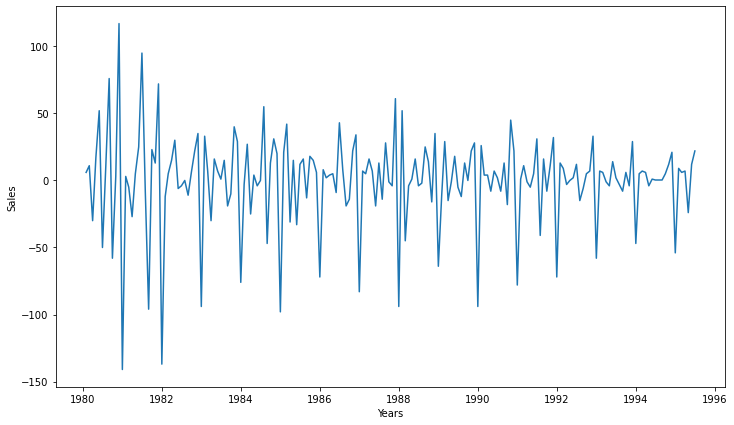

In [67]:
#Performing d=1 transformation : 
plt.figure(figsize=(12,7))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sales');

In [68]:
diff=sales_ts.diff(periods=1).dropna()
dftest = adfuller(diff)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

#p value is 0 which tells us that the differenced series is stationary.

DF test statistic is -8.044
DF test p-value is 0.0000


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# ARIMA

In [69]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]),)
print('\n\n')  

    
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

#importing package
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

    
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)



ARIMA(0, 1, 0) - AIC:1333.1546729124348


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1281.8707222264356


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.720740597716


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 1, 3) - AIC:1278.6679167115944


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\2015717322.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


,param,AIC
11,"(2, 1, 3)",1274.695412
15,"(3, 1, 3)",1278.667917
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.57423
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 13 Aug 2023   AIC                           1274.695
Time:                        14:52:32   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

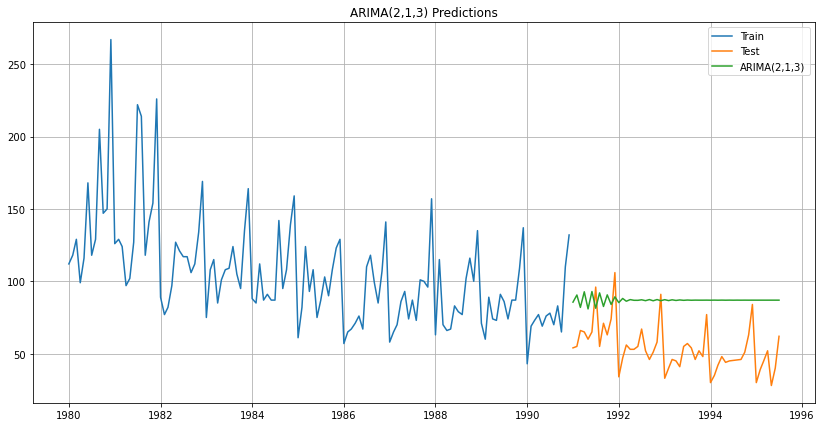

In [70]:
# building ARIMA with best p,d,q values
best_model = ARIMA(train, order = (2,1,3))
best_results = best_model.fit()

print(best_results.summary())

predicted_ARIMA = best_results.forecast(steps=len(test))

## Plotting the Training data, Test data and the forecasted values
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_ARIMA, label='ARIMA(2,1,3)')

plt.legend(loc='best')
plt.grid()
plt.title('ARIMA(2,1,3) Predictions');

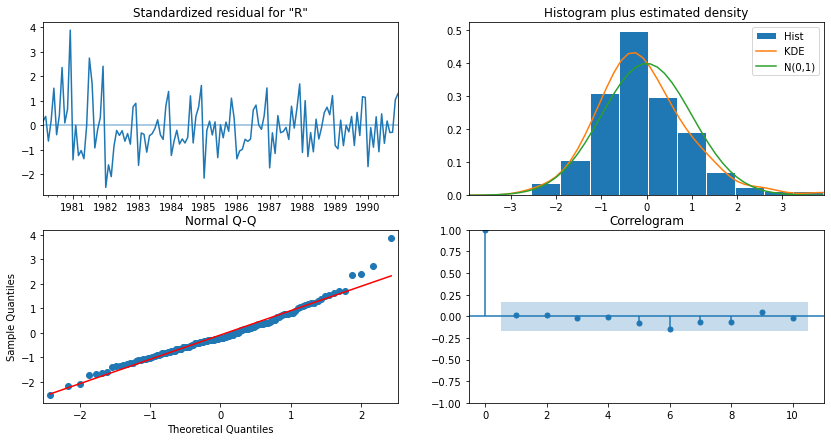

In [71]:

best_results.plot_diagnostics()
plt.show()

In [72]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=predicted_ARIMA
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,85.595789
1991-02-01,55.0,90.535998
1991-03-01,66.0,81.967217
1991-04-01,65.0,92.746555
1991-05-01,60.0,80.902653
1991-06-01,65.0,92.921603
1991-07-01,96.0,81.384994
1991-08-01,55.0,91.984470
1991-09-01,71.0,82.606135


# Model Evaluation

In [73]:
rmse_arima = mean_squared_error(test['Rose'],predicted_ARIMA,squared=False)
print('For the model ARIMA(0,1,2) on test data, RMSE is',rmse_arima)


resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_arima]} ,index=['ARIMA(0,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

For the model ARIMA(0,1,2) on test data, RMSE is 36.812983948773486


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha = 0.09, SES",36.796241
"Alpha=1.4e-08, Beta=1.6e-10, DES",15.268944
"Alpha=0.07,Beta=0.04,Gamma=7.2e-05 TES(A,A,M)",20.156763


# SARIMA

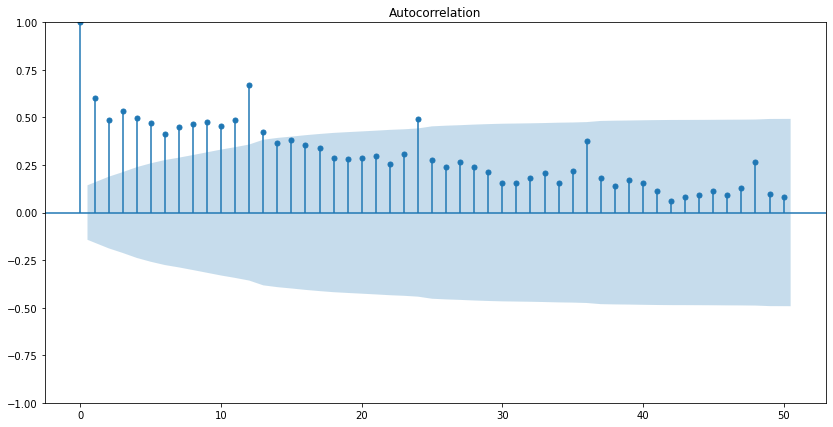

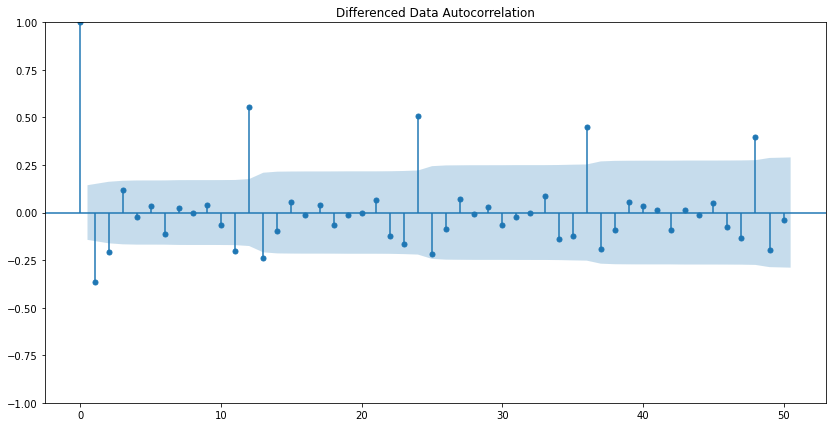

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [75]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))
print('\n\n')

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)





In [76]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:5718.421796606624
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753448


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3923.111981743881


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945653


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3735.47970250528


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270265051


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127558


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3463.5988181011626
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938387


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:5697.443976122974
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094548


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483293343


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3779.901223324475
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461666


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988256216015


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3709.9417322302766
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976478365


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.484493162141


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269379617


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3695.7078636456276
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054104


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264913


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617699


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:5274.882125362548
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413673


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093355627


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913581822


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2500.5105450231245
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257978


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034652


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679584


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2563.981616133711
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189375205


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533189


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.520652826136


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2666.3931438665522
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739152


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646079987


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380713


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:5125.203630829177


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212232


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936157


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340468


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3804.225429137994


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987096


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996896724


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788249415


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3605.2986576627577
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124771223


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772338811


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150752298563


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3642.462844594013
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585719


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5776.225563773753
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055024756


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948193


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3611.083522911877
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661067


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071328


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3544.9005448954404
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272586


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573468


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086833714


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3530.49919829007
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255505


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864085


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.086222406386


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:5143.155178182782
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965032806


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135129


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428503279


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3885.4831308765374


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.924906084468


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470745


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593691


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3815.529185431417


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439386802


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447855586


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.811385029159


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3801.305225834893


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706236


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100865


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.493840271503


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:5691.958795261579
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760922493494


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183220083724


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500508657


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3771.2890404795453


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690197403764


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827986624


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.902849369327


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3701.427574717762
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.007380246502


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805560863


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390249251345


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3688.8329148727094
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316496


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.984973917893


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105124817


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:5542.087568167045
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676177


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950927105722


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291501883


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2675.583928286201
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687609711808


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955658842624


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886590070266


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3612.6634118577945


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903135001575


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140930992


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467947378354


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2802.1057393772394
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471139


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.079320882996


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:5765.765302128545
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575974


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864115


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558947


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3925.340480882403


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645396


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384721


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280806


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3856.384337921692


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.053640740921


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903399


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372294


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4036.928628093844
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231797984


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949367


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472071411


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:5766.882547119737
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101342


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204804


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822729


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3887.483130874628


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536955


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286772


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3023.3509150271693
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260025772


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259064494


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598886524745


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3778.082117738038
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146685


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259821


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311108079


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5693.447859540391
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713704332


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354771824


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488809099


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3544.171182936432
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348852


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889114674


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981961567


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3363.247345298559
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712451123


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035240284


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640482420575


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3448.586951281936
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8700952681038


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073335028844


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349329441934


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:5543.753223984078
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563236091426


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046196912473


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483346398198


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3791.940434772261
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301555346


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328123179304


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191801415338


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3712.1478947283126
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420812777


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101471700199


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452503916601


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3682.321753088024
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042212


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118005


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5766.362730374765
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.546845672638


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783845


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.686599630471


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3929.1119817438826


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197914127


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976507


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.043881647289


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3858.38433791898


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527213


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662588


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017225135


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3663.4959139908783
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709434


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641212364


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547116


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:5911.805300015063
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.61491365135


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837553975168


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384298


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3889.4831308745534


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.320445989856


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853833


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523267522


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3515.384216943545
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990286204


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300778068


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002852238873


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3915.3936297312184
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652484905


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401266596


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980111823309


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3755.5226470983303
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211372457


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260532411327


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875105233226


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4032.940587702241
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3182497694606


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441364618


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431082346437


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:4711.656428387589
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505640849973


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462137736811


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809344347368


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3912.7267296416185


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385827869794


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.53976435309


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.33401583708


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:5616.149196632079
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8458967463102


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380406678


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483664933341


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3543.040328958739
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711763861


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100767557


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714977788


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3695.3866332522175
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184909056


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690408935078


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316168676531


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3680.734077317536


C:\Users\Admin\AppData\Local\Temp\ipykernel_13320\1637802266.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [77]:
#Sorting by least values of AIC
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400285
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880934
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.49533
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


# SARIMA- 1

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.519
Date:                                 Sun, 13 Aug 2023   AIC                            775.038
Time:                                         15:00:01   BIC                            800.256
Sample:                                     01-01-1980   HQIC                           785.216
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0785      0.123      0.638      0.524      -0.163       0

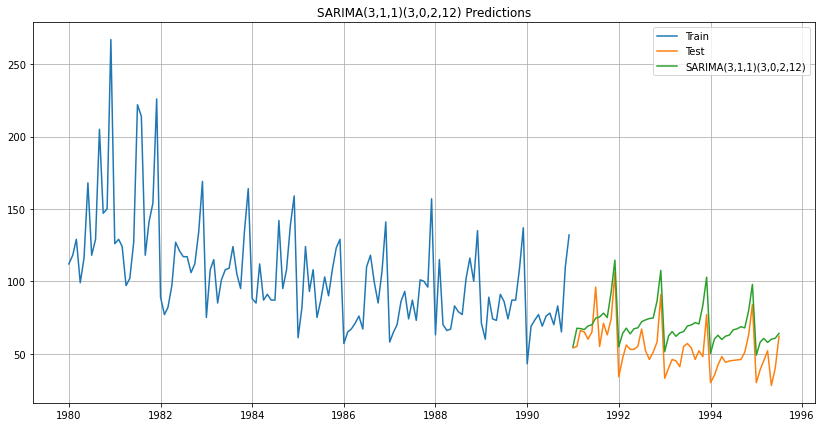

In [78]:
best_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(3, 1, 1),
                                      seasonal_order=(3, 0, 2, 12),
                                      enforce_stationarity=False)
best_results = best_model.fit()

print(best_results.summary())

predicted_SARIMA = best_results.forecast(steps=len(test))

## Plotting the Training data, Test data and the forecasted values
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_SARIMA, label='SARIMA(3,1,1)(3,0,2,12)')

plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3,1,1)(3,0,2,12) Predictions');

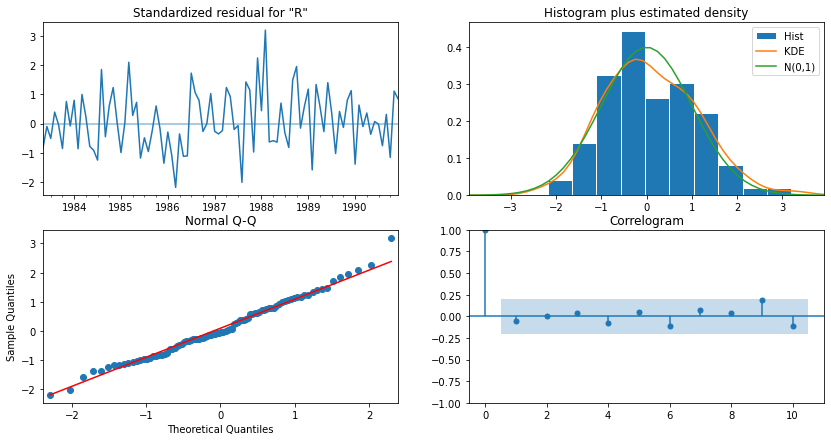

In [79]:
best_results.plot_diagnostics()
plt.show()

In [80]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Rose']
table1['Prediction']=predicted_SARIMA
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,54.0,54.877546
1991-02-01,55.0,67.562759
1991-03-01,66.0,67.331698
1991-04-01,65.0,66.671740
1991-05-01,60.0,69.091041
1991-06-01,65.0,69.986101
1991-07-01,96.0,74.576856
1991-08-01,55.0,75.349420
1991-09-01,71.0,77.995322


# Model Evaluation

In [81]:
rmse_sarima = mean_squared_error(test['Rose'],predicted_SARIMA,squared=False)
print('For the model SARIMA(3,1,1)(3,0,2,12) on test data, RMSE is',rmse_sarima)


resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_sarima]} ,index=['SARIMA(3,1,1)(3,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

For the model SARIMA(3,1,1)(3,0,2,12) on test data, RMSE is 18.259388074343416


,Test RMSE
Linear Regression,15.269000
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha = 0.09, SES",36.796241
"Alpha=1.4e-08, Beta=1.6e-10, DES",15.268944
"Alpha=0.07,Beta=0.04,Gamma=7.2e-05 TES(A,A,M)",20.156763


### 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [82]:
resultDf= resultsDf.sort_values(by='Test RMSE')
resultDf

,Test RMSE
2pointTrailingMovingAverage,11.529278
"Alpha=0.08,Beta=0.0002,Gamma=0.003 TES(A,A,A)",14.249661
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=1.4e-08, Beta=1.6e-10, DES",15.268944
Linear Regression,15.269000
"SARIMA(3,1,1)(3,0,2,12)",18.259388
"Alpha=0.07,Beta=0.04,Gamma=7.2e-05 TES(A,A,M)",20.156763
"Alpha = 0.09, SES",36.796241


In [89]:
result=pd.DataFrame()
result['Test RMSE']=resultDf['Test RMSE']

result.index=['Moving Average -1','TES(A,A,A)','Moving Average -2','Moving Average-3','Moving Average-3','DES','Linear Regression','SARIMA','TES(A,A,M)','SES','ARIMA','Simple Average Model','Naive Model']
result['Parameters']=['2 point','Alpha=0.08, Beta=0.0002, Gamma=0.003','4 point', '6 point', '9 point','Alpha=1.4e-08, Beta=1.6e-10','','(3,1,1)(3,0,2,12)','Alpha=0.07,Beta=0.04,Gamma=7.2e-05','Alpha = 0.09','(0,1,2)','','']



In [90]:
result1=pd.DataFrame()
result1.index=result.index
result1['Parameters']=result['Parameters']
result1['Test RMSE']=result['Test RMSE']
result1


,Parameters,Test RMSE
Moving Average -1,2 point,11.529278
"TES(A,A,A)","Alpha=0.08, Beta=0.0002, Gamma=0.003",14.249661
Moving Average -2,4 point,14.451403
Moving Average-3,6 point,14.566327
Moving Average-3,9 point,14.727630
DES,"Alpha=1.4e-08, Beta=1.6e-10",15.268944
Linear Regression,,15.269000
SARIMA,"(3,1,1)(3,0,2,12)",18.259388
"TES(A,A,M)","Alpha=0.07,Beta=0.04,Gamma=7.2e-05",20.156763
SES,Alpha = 0.09,36.796241


### 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

# Predictions based on TES(A,A,A) 

RMSE of the TES (A,A,A) model on the whole data: 17.691884349617094 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)





1995-08-01    49.559654
1995-09-01    46.404783
1995-10-01    45.143892
1995-11-01    59.746585
1995-12-01    98.038201
1996-01-01    13.572702
1996-02-01    23.870402
1996-03-01    31.418367
1996-04-01    24.209153
1996-05-01    27.555016
1996-06-01    33.050243
1996-07-01    43.649495
Freq: MS, dtype: float64 /n/n


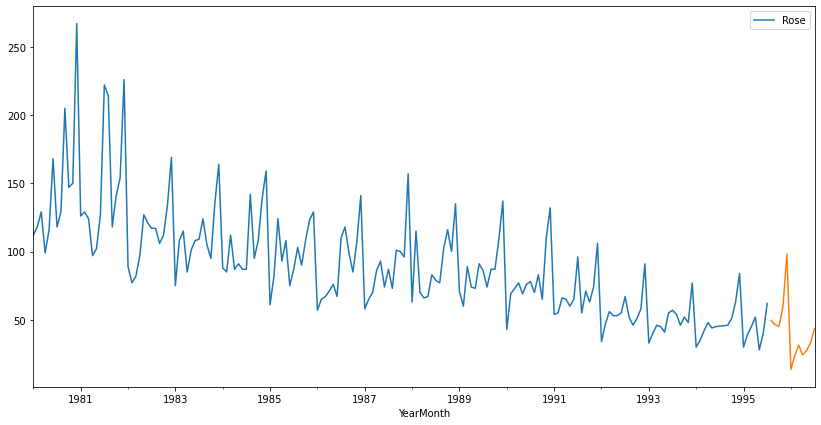

In [85]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.08954054664605082,
                                                                 smoothing_trend=0.0002400108693915795,
                                                                 smoothing_seasonal=0.003466872515750747)

RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE of the TES (A,A,A) model on the whole data:',RMSE_fullmodel1, '\n\n')

# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)
print(prediction_1,'/n/n')


df.plot()
prediction_1.plot();


,lower_CI,prediction,upper_CI
1995-08-01,14.790479,49.559654,84.328828
1995-09-01,11.635608,46.404783,81.173957
1995-10-01,10.374718,45.143892,79.913067
1995-11-01,24.977411,59.746585,94.515760
1995-12-01,63.269027,98.038201,132.807376
1996-01-01,-21.196473,13.572702,48.341876
1996-02-01,-10.898772,23.870402,58.639577
1996-03-01,-3.350807,31.418367,66.187542
1996-04-01,-10.560022,24.209153,58.978328
1996-05-01,-7.214159,27.555016,62.324190


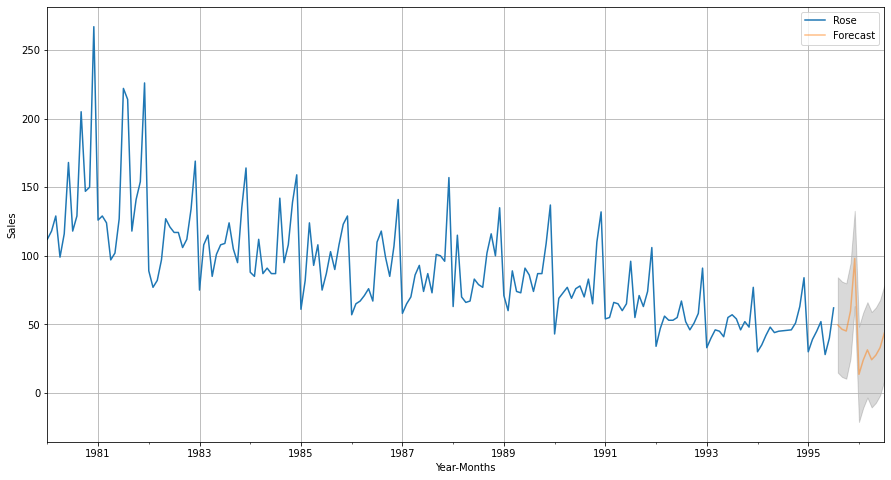

In [86]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_CI': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
display(pred_1_df)

print('\n\n')

# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# 2 point moving average

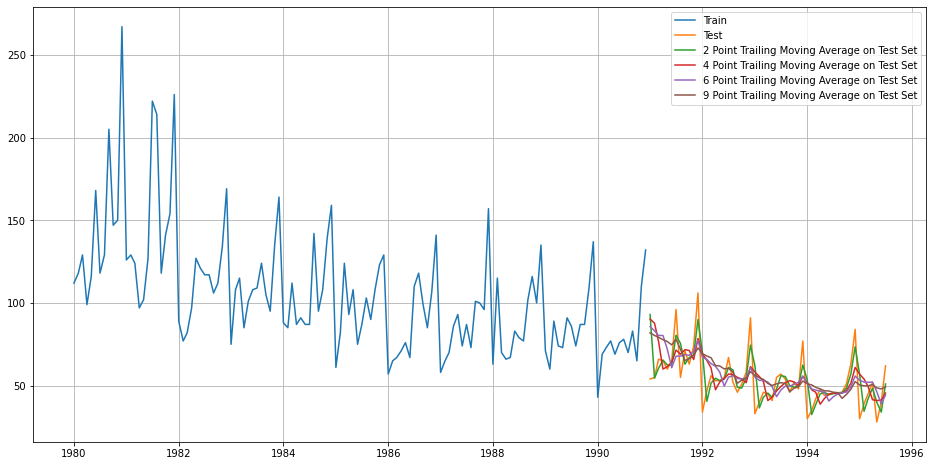

In [87]:
#Creating train and test set #Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

## Plotting on both the Training and Test data


plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

# Predictions based on SARIMA

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -581.285
Date:                                 Sun, 13 Aug 2023   AIC                           1182.571
Time:                                         15:00:08   BIC                           1212.475
Sample:                                     01-01-1980   HQIC                          1194.721
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0354      0.094      0.377      0.706      -0.149       0

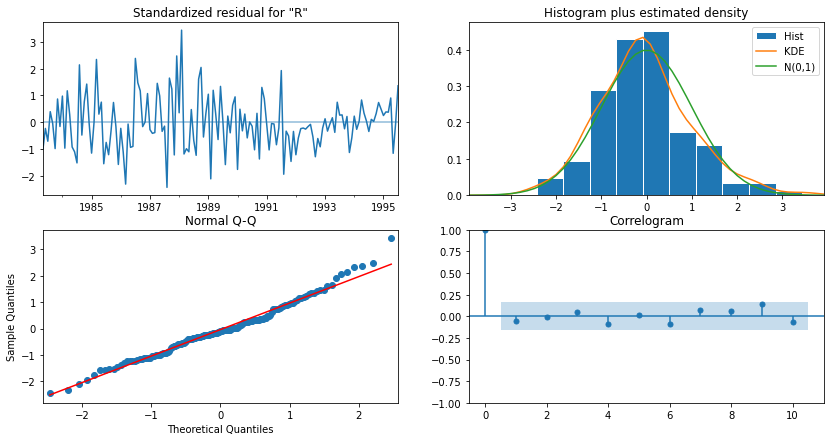

In [88]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(3,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())


print('\n\n\n') 

rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the model SARIMA(3,1,1)(3,0,2,12) on the whole data:',rmse)
print('\n\n') 

results_full_data_model.plot_diagnostics();


### 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.